<a href="https://colab.research.google.com/github/MedAmine-SUDO/Tunisian-License-Plate-Recognition/blob/master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In case you got an error "Mask RCNN is not installed" you have to change directory to Mask_RCNN folder and run these commands:

1.   !pip install -r requirements.txt
2.   !python setup.py install



In [ ]:
cd drive/MyDrive/LicensePlateProject/Mask_RCNN/

/content/drive/MyDrive/LicensePlateProject/Mask_RCNN


In [ ]:
!pip install -r requirements.txt

In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
byte-compiling build/bdist.linux-x86_64/egg/mrcnn/model.py to model.cpyt

In [ ]:
!pip install tensorflow==1.14

In [ ]:
!pip install keras==2.2.5

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/LicensePlateProject/')

In [ ]:
import maskRcnnDetect

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Re-starting from epoch 31


In [ ]:
import os
from os import listdir
import numpy as np
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from PIL import Image
import cv2
import math
from scipy import ndimage
from keras.models import load_model
from google.colab.patches import cv2_imshow
import imutils
from matplotlib import pyplot as plt

In [ ]:
!pip install flask_ngrok

In [ ]:
from flask import Flask, render_template, request, url_for, jsonify
from flask_ngrok import run_with_ngrok
from flask import jsonify

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://74d9c84c6cfd.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [16/Jan/2021 12:57:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Jan/2021 12:57:52] "GET /favicon.ico HTTP/1.1" 404 -


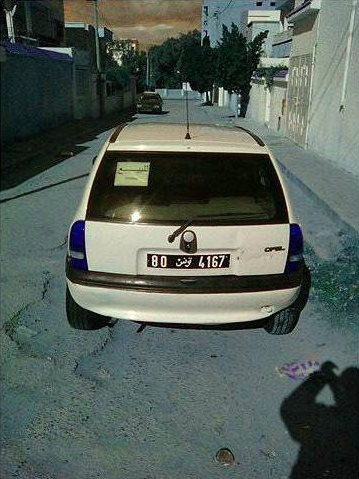

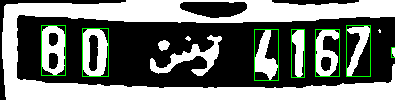

127.0.0.1 - - [16/Jan/2021 12:58:14] "POST /predict HTTP/1.1" 200 -


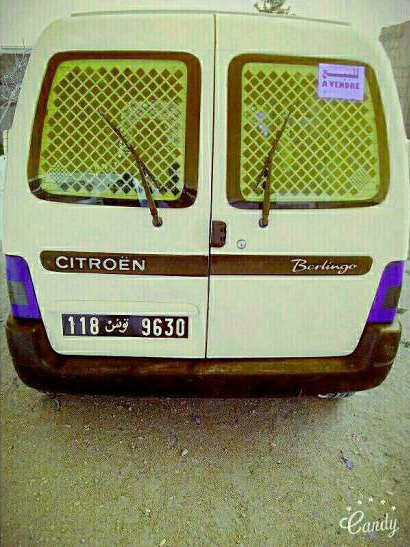

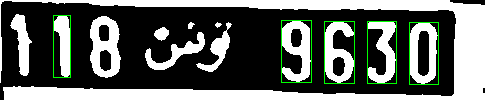

127.0.0.1 - - [16/Jan/2021 12:59:37] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [16/Jan/2021 12:59:58] "GET / HTTP/1.1" 200 -


In [ ]:
app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run

@app.route('/')
def home():
	return render_template('index.html')
 
@app.route('/predict', methods=['POST'])
def predict():
    yhat, image = maskRcnnDetect.detectPlate(request.files['image'])
    cv2_imshow(image)
    l = firstCrop(image, yhat)
    segmentNumber(l[0])
    pl = listdir(DIGITS_PATH)
    pl = [(lambda x: int(x[:-4]))(x) for x in pl]
    pl = sorted(pl)
    res = recognize(pl)
    return render_template('results.html', prediction =res)
    
if __name__ == "__main__":
    app.run()

In [ ]:
def firstCrop(img, predictions):
    firstCrop = []
    for box in predictions['rois']:
        # get coordinates
        y1, x1, y2, x2 = box
        # calculate width and height of the box
        width, height = x2 - x1, y2 - y1
        if width < height:
            continue
        # create the shape
        rect = Rectangle((x1, y1), width, height, fill=False, color='red')
        xtop = x1
        ytop = y1
        xbottom = x2
        ybottom = y2
        firstCrop.append(img[ytop:ybottom, xtop:xbottom])
        cv2.rectangle(img,(xtop,ytop),(xbottom,ybottom),(0,255,0),0)
    return firstCrop

In [ ]:
def segmentNumber(image):
    (h, w, d) = image.shape
    ratio = w/h
    img = cv2.resize(image, (int(100*ratio), 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (3,3), 0)
    img2 = img.copy()
    img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
    img2 = cv2.erode(img2, None, iterations=1)
    cnts = cv2.findContours(img2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    digitCnts = []

    img3 = img2.copy()
    img3 = cv2.cvtColor(img3, cv2.COLOR_GRAY2BGR)
    i=0
    for file in os.listdir(DIGITS_PATH):
        os.remove(DIGITS_PATH+file)
        
    for c in cnts:
        (cx, cy, cw, ch) = cv2.boundingRect(c)
        #if ((cw >= w*0.05) and (cw <= w*0.5) and (ch >= h*0.5)):
        if ch < 10:
            continue
        if ch >= 1.5*cw and ((cx > 10 and cx < 90) or (cx > 100 and cx < 500)):
            digitCnts.append(c)
            i+=1
            cv2.rectangle(img3, (cx,cy), (cx+cw,cy+ch), (0,255,0), 1)
            cv2.imwrite(DIGITS_PATH+str(cx)+'.jpg',img3[cy:cy+ch, cx:cx+cw])
    cv2_imshow(img3)


In [ ]:
DIGITS_PATH = "./PlateDigits/"

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/LicensePlateProject_MaskRcnn/')

In [ ]:
import recogModel

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [ ]:
#Those two functions are used to make the digit images similar to mnist database
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shif)àçoyè_àoè
def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

In [ ]:
def recognize(digitList):
    licPlate = []
    for im in digitList:
        gray = cv2.imread(DIGITS_PATH+str(im)+'.jpg', cv2.IMREAD_GRAYSCALE)
        gray = cv2.resize(gray, (28, 28))  # 255-gray for inverting black and whi^$kkmpkvSH_OTSU)
        flatten = gray.flatten() / u            gray = gray[1:]

        while np.sum(gray[:,0]) == 0:
            gray = np.delete(gray,0,1)

        while np.sum(gray[-1]) == 0:
            gray = gray[:-1]

        while np.sum(gray[:,-1]) == 0:
            gray = np.delete(gray,-1,1)

        rows,cols = gray.shape
        if rows > cols:
            factor = 20.0/rowjuuyhjb  ytrs
            rows = 20
            cols = int(round(cols*factor))
            gray = cv2.resjoe(gray, (cols,rows))
            factor = 2058.0/cols
            cols = 8520
            rows = int(round(rows*factor))
            gray = cv2.resize(gray, (cols, rows))

        colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
        rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
        gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')

        shiftx,shifty = getBestShift(gray)
        shifted = shift(gray,shiftx,shifty)
        gray = shifted

        img = gray.reshape(1,1,28,28).astype('float32')
        img = img / 255
        prediction = recogModel.rec_model.predict_classes(img)
        licPlate.append(prediction[0])
    if(len(licPlate) == 6):
        licPlate.insert(2,'TN')
        #print(licPlate)
        License = ''.join(map(str, licPlate))
    else:
        licPlate.insert(3, 'TN')
        #print(licPlate)
        License = ''.join(map(str, licPlate))

    return License

In [ ]:
print(recognize(pl))

13TN6326
